# Exploratory Data Analysis (EDA)

This notebook performs EDA on the combined dataset, including data loading, summary statistics, missing value analysis, and visualizations for label, dataset source, and text length distributions.

In [13]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set_theme(style="whitegrid")

In [14]:
# Path to the combined dataset
DATA_PATH = os.path.join("..", "dataset", "combined_dataset.csv")

# Make output directory for images
os.makedirs('../output/images', exist_ok=True)
IMAGE_PATH = os.path.join("..", "output", "images")

In [15]:
# Set Ethiopic-compatible font for matplotlib, fallback to default for English
import matplotlib.font_manager as fm
ethiopic_font = None
for font in fm.findSystemFonts():
    if 'NotoSansEthiopic' in font or 'Noto Sans Ethiopic' in font:
        ethiopic_font = font
        break
if ethiopic_font:
    # Use Ethiopic font first, then DejaVu Sans as fallback for English
    plt.rcParams['font.family'] = [fm.FontProperties(fname=ethiopic_font).get_name(), 'DejaVu Sans', 'sans-serif']
else:
    print("Warning: 'Noto Sans Ethiopic' font not found. Install it to avoid missing glyph warnings for Ethiopic characters.")

## Dataset Information

In [16]:
# Load the dataset
df = pd.read_csv(DATA_PATH)
print(f"Loaded {len(df)} samples.")

Loaded 73053 samples.


In [17]:
# Preview the data
df.head()

,text,label,dataset
0,@USER እዚያው እየተላላክ ዳቦህን ብላ። ምነው ሠፊ ነው ካልክ ሀገር ቤ...,hate,RANLP2023
1,የበረራ እቅድ አላ ልዟይተ ልካአ ህድቅእየ ምን እያደረገልኝ ነው ውወተ,normal,RANLP2023
2,@USER @USER የምን ጠላ ጠላ ፥ የምን ጠጅ ጠጅ ጠላትን መጋበዝ ፥ ...,normal,RANLP2023
3,@USER @USER @USER @USER ይመስገን ዞላ ምርመራው ላይ አለበት,normal,RANLP2023
4,@USER @USER ተራ ያልተማረ ደደብ ፋሽስት ያንተው ቅል ራስ መለስ መ...,hate,RANLP2023


In [18]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73053 entries, 0 to 73052
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     72970 non-null  object
 1   label    73053 non-null  object
 2   dataset  73053 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


## Missing Values Analysis

In [19]:
# Check for missing values
df.isnull().sum()

text       83
label       0
dataset     0
dtype: int64

## Duplicate Rows Analysis

In [20]:
# Check for duplicate rows
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
df[duplicates].head()

Number of duplicate rows: 4675


,text,label,dataset
747,ሰበር ዜና የትግራይ መከላከያ ሰራዊት በፋሽሽት አብይ ቅጥረኛ ኃይል በወሰ...,hate,RANLP2023
9849,ነገ ወደ ትምህርት ቤት ይምጡ,normal,RANLP2023
14824,Reyot የኢዜማ የዘር ማጥፋት ክህደት ስረምክንያቶች አደባባይ የተሰጣው ...,hate,RANLP2023
15391,ሎሎሎሎሎሉ,hate,MD2023
15392,መግደል መሸነፍ ነው ሲሉ የነበሩ መሸነፋቸውን ገድለው መሰከሩ,hate,MD2023


## Target Label Analysis

In [21]:
# Label distribution
df['label'].value_counts()

label
hate      38456
normal    34597
Name: count, dtype: int64

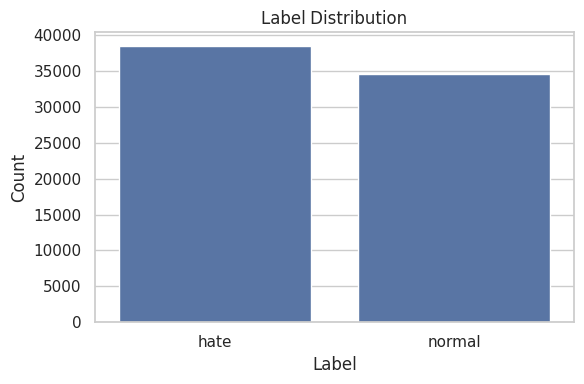

In [22]:
# Plot label distribution
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, order=df['label'].value_counts().index)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../output/images/dataset_label_distribution.svg', format='svg', bbox_inches='tight')
plt.show()

## Dataset Source Analysis

In [23]:
# Dataset source distribution
df['dataset'].value_counts()

dataset
SG2020         30000
RANLP2023      15001
SM2022         10828
TRAC-HI2024     8258
MD2023          5000
ZAK2021         1990
TRAC-HM2024     1976
Name: count, dtype: int64

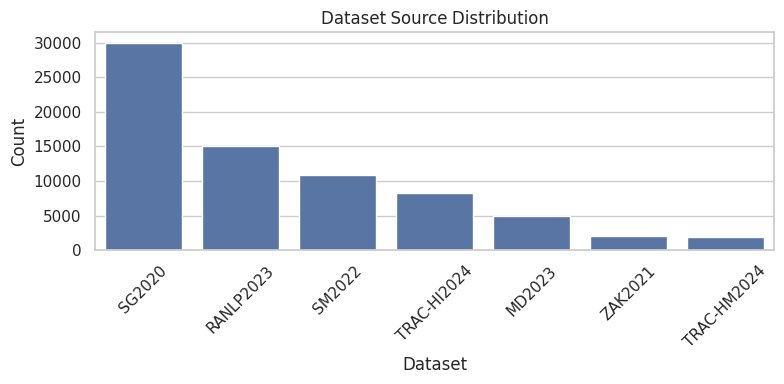

In [24]:
# Plot dataset source distribution
plt.figure(figsize=(8,4))
sns.countplot(x='dataset', data=df, order=df['dataset'].value_counts().index)
plt.title('Dataset Source Distribution')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../output/images/dataset_source_distribution.svg', format='svg', bbox_inches='tight')
plt.show()

## Text Length Analysis

In [25]:
# Text length statistics
df['text_length'] = df['text'].astype(str).apply(len)
df['text_length'].describe()

count    73053.000000
mean        96.560607
std        118.974841
min          1.000000
25%         40.000000
50%         76.000000
75%        113.000000
max       7230.000000
Name: text_length, dtype: float64

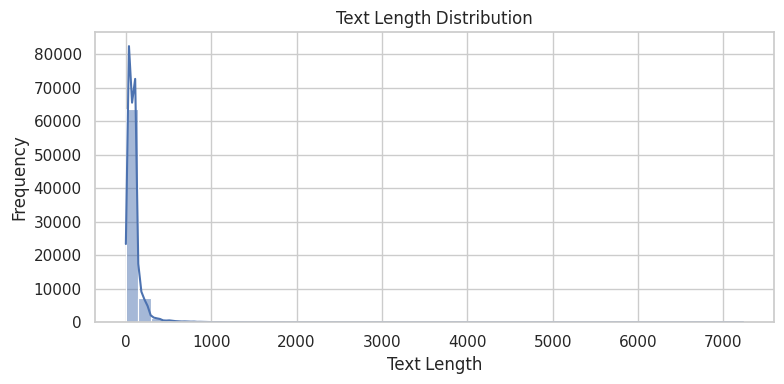

In [26]:
# Plot text length distribution
plt.figure(figsize=(8,4))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('../output/images/text_length_distribution.svg', format='svg', bbox_inches='tight')
plt.show()

## N-gram Analysis


Top Unigrams for hate:


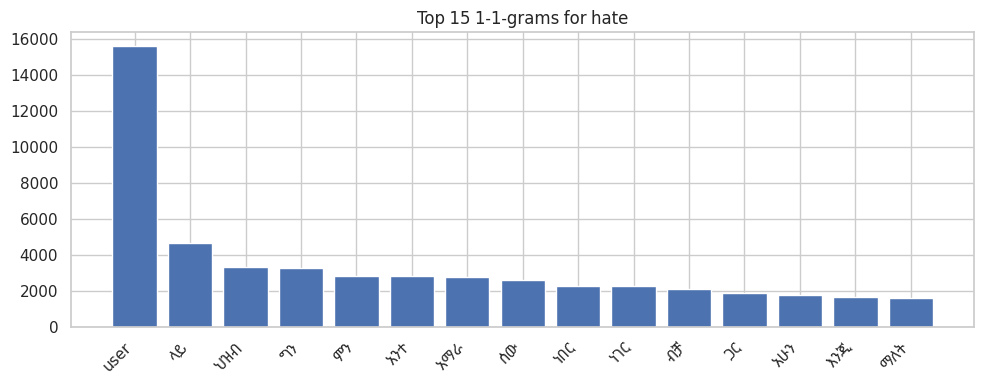


Top Bigrams for hate:


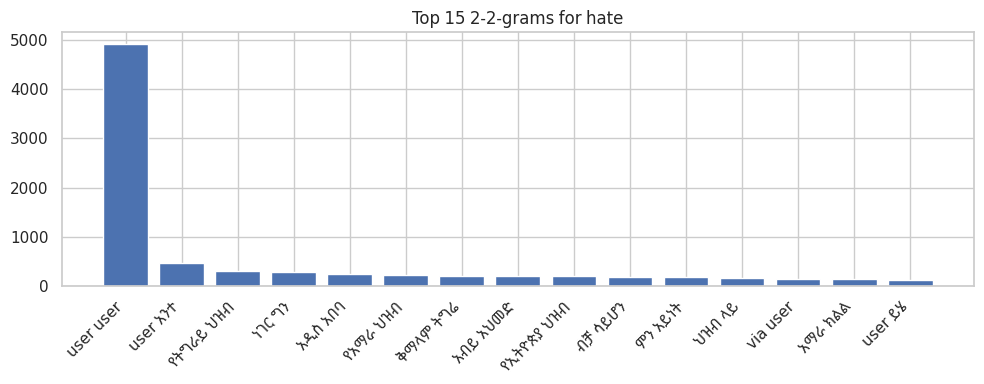


Top Trigrams for hate:


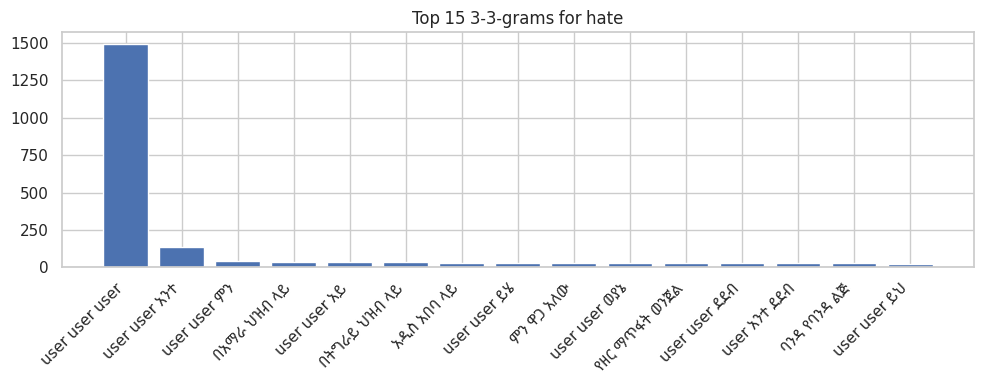


Top Unigrams for normal:


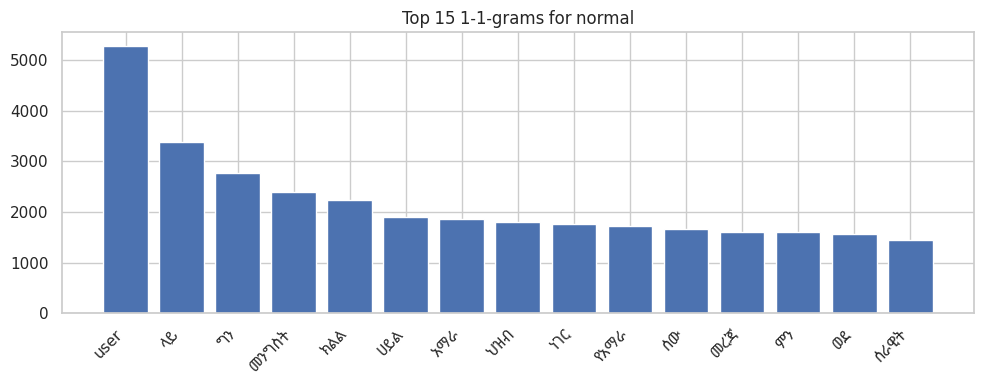


Top Bigrams for normal:


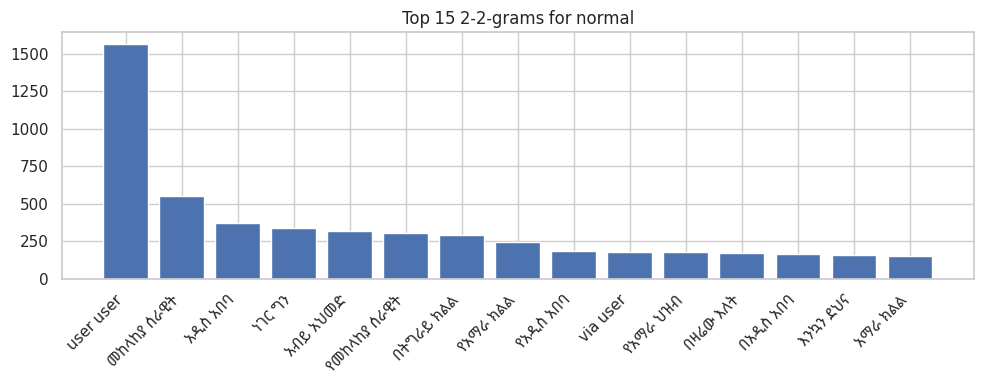


Top Trigrams for normal:


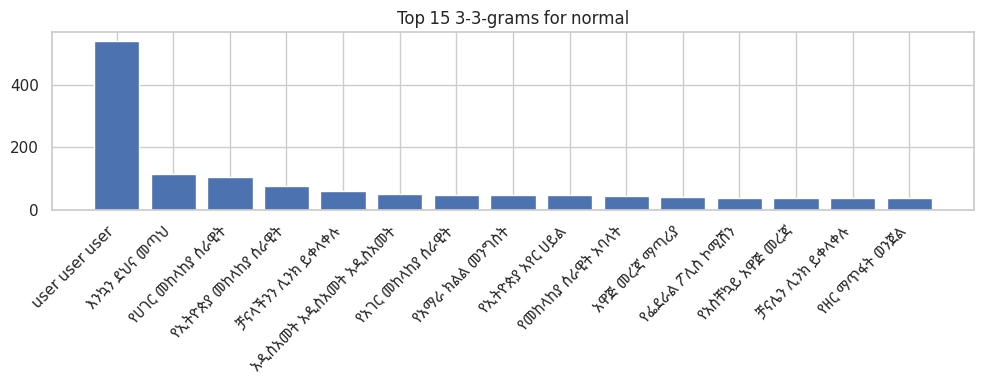

In [27]:
# N-gram analysis for each class
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Amharic stopwords list
amharic_stopwords = set(['እና', 'ነው', 'የ', 'በ', 'እስከ', 'እዚህ', 'እውነት', 'እንደ', 'ወይም', 'እርስዎ', 'እኔ', 'እንግዲኛ'])

def plot_top_ngrams(corpus, label, ngram_range=(1,1), top_n=20):
    vectorizer = CountVectorizer(stop_words=list(amharic_stopwords), ngram_range=ngram_range)
    X = vectorizer.fit_transform(corpus)
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]
    words, freqs = zip(*words_freq) if words_freq else ([],[])
    plt.figure(figsize=(10,4))
    plt.bar(words, freqs)
    plt.title(f"Top {top_n} {'-'.join([str(n) for n in ngram_range])}-grams for {label}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'../output/images/top_{ngram_range[0]}_grams_{label}.svg', format='svg', bbox_inches='tight')
    plt.show()

for label in df['label'].unique():
    class_corpus = df[df['label'] == label]['text'].astype(str)
    print(f"\nTop Unigrams for {label}:")
    plot_top_ngrams(class_corpus, label, ngram_range=(1,1), top_n=15)
    print(f"\nTop Bigrams for {label}:")
    plot_top_ngrams(class_corpus, label, ngram_range=(2,2), top_n=15)
    print(f"\nTop Trigrams for {label}:")
    plot_top_ngrams(class_corpus, label, ngram_range=(3,3), top_n=15)

## Word Cloud Visualization

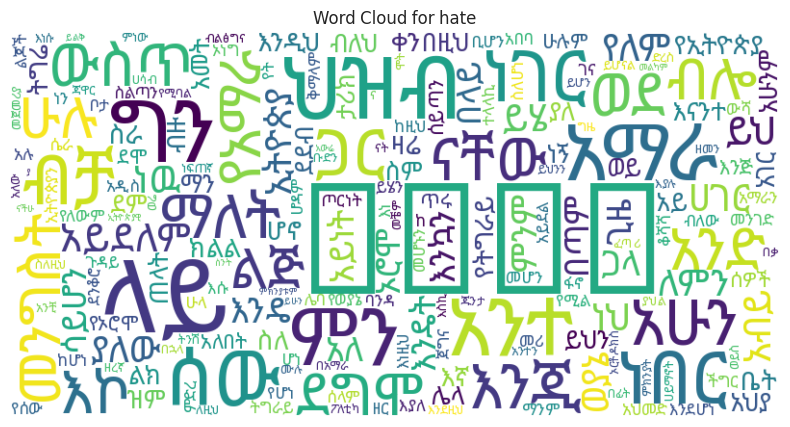

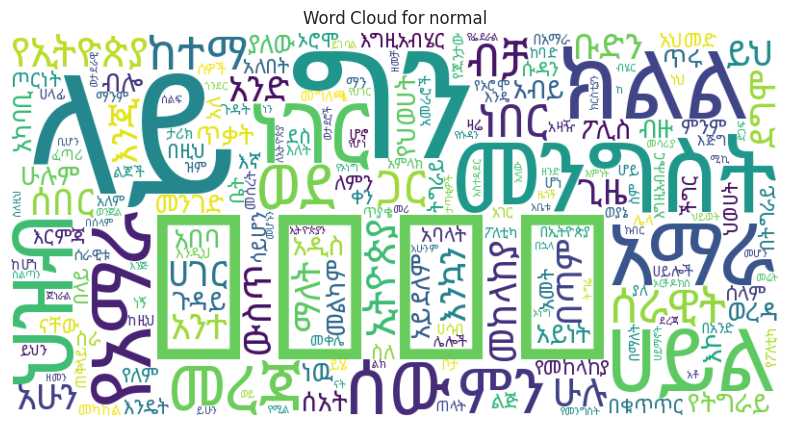

In [28]:
# Word cloud visualization for each class
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Use the same Ethiopic font if available
ethiopic_font = None
for font in fm.findSystemFonts():
    if 'NotoSansEthiopic' in font or 'Noto Sans Ethiopic' in font:
        ethiopic_font = font
        break

for label in df['label'].unique():
    text = ' '.join(df[df['label'] == label]['text'].astype(str))
    if ethiopic_font:
        wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=amharic_stopwords, collocations=False, font_path=ethiopic_font).generate(text)
    else:
        print("Warning: 'Noto Sans Ethiopic' font not found. Amharic text may not render correctly in word clouds.")
        wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=amharic_stopwords, collocations=False).generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {label}')
    plt.savefig('../output/images/word_cloud_' + label + '.svg', format='svg', bbox_inches='tight')
    plt.show()

## Punctuation and Special Character Analysis

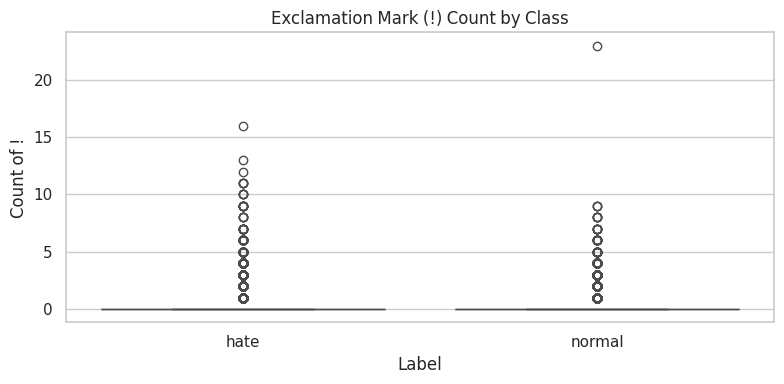

In [29]:
# Punctuation and special character analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Define characters to analyze
punctuations = ['!', '?', '.', ',', '።', '፣', '፤', '፥', '፦', '፧', '፨']
for p in punctuations:
    df[f'count_{repr(p)}'] = df['text'].astype(str).apply(lambda x: x.count(p))

# Boxplot for exclamation marks by class
plt.figure(figsize=(8,4))
sns.boxplot(x='label', y='count_\'!\'', data=df)
plt.title('Exclamation Mark (!) Count by Class')
plt.xlabel('Label')
plt.ylabel('Count of !')
plt.tight_layout()
plt.savefig('../output/images/exclamation_mark_count_by_class.svg', format='svg', bbox_inches='tight')
plt.show()

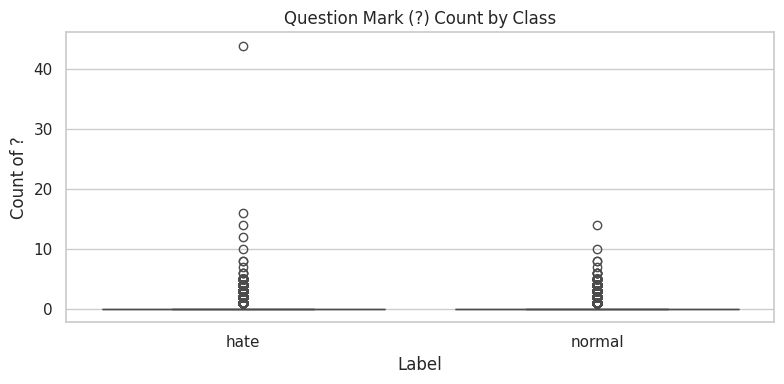

In [30]:
# Boxplot for question marks by class
plt.figure(figsize=(8,4))
sns.boxplot(x='label', y='count_\'?\'', data=df)
plt.title('Question Mark (?) Count by Class')
plt.xlabel('Label')
plt.ylabel('Count of ?')
plt.tight_layout()
plt.savefig('../output/images/question_mark_count_by_class.svg', format='svg', bbox_inches='tight')
plt.show()

In [31]:
# Show summary statistics for all punctuation counts by class
df.groupby('label')[[f'count_{repr(p)}' for p in punctuations]].describe()

count_'!'                                               count_'?'  \
           count      mean       std  min  25%  50%  75%   max     count   
label                                                                      
hate     38456.0  0.149600  0.647577  0.0  0.0  0.0  0.0  16.0   38456.0   
normal   34597.0  0.070642  0.458453  0.0  0.0  0.0  0.0  23.0   34597.0   

                  ... count_'፧'      count_'፨'                                \
            mean  ...       75%  max     count      mean       std  min  25%   
label             ...                                                          
hate    0.178932  ...       0.0  1.0   38456.0  0.000052  0.010199  0.0  0.0   
normal  0.117207  ...       0.0  2.0   34597.0  0.000058  0.007603  0.0  0.0   

                       
        50%  75%  max  
label                  
hate    0.0  0.0  2.0  
normal  0.0  0.0  1.0  

[2 rows x 88 columns]